----------
multigraph False
no isolates
[[0. 5. 9. 0. 6. 3. 3. 7. 8. 6. 1. 7. 0. 0. 0. 0. 4.]
 [5. 0. 2. 0. 6. 7. 1. 5. 2. 2. 0. 8. 0. 4. 7. 9. 0.]
 [9. 2. 0. 2. 2. 1. 3. 5. 0. 0. 2. 0. 1. 0. 0. 5. 0.]
 [0. 0. 2. 0. 0. 6. 0. 0. 1. 5. 5. 1. 0. 7. 6. 9. 0.]
 [6. 6. 2. 0. 0. 9. 0. 0. 1. 8. 5. 5. 4. 8. 0. 0. 0.]
 [3. 7. 1. 6. 9. 0. 4. 5. 7. 0. 0. 3. 9. 4. 0. 9. 0.]
 [3. 1. 3. 0. 0. 4. 0. 0. 0. 4. 7. 0. 7. 0. 6. 9. 0.]
 [7. 5. 5. 0. 0. 5. 0. 0. 4. 3. 0. 0. 0. 5. 4. 8. 9.]
 [8. 2. 0. 1. 1. 7. 0. 4. 0. 0. 9. 7. 0. 4. 6. 2. 4.]
 [6. 2. 0. 5. 8. 0. 4. 3. 0. 0. 1. 0. 8. 4. 1. 0. 2.]
 [1. 0. 2. 5. 5. 0. 7. 0. 9. 1. 0. 9. 0. 8. 0. 1. 2.]
 [7. 8. 0. 1. 5. 3. 0. 0. 7. 0. 9. 0. 5. 0. 6. 0. 0.]
 [0. 0. 1. 0. 4. 9. 7. 0. 0. 8. 0. 5. 0. 9. 0. 0. 4.]
 [0. 4. 0. 7. 8. 4. 0. 5. 4. 4. 8. 0. 9. 0. 9. 3. 0.]
 [0. 7. 0. 6. 0. 0. 6. 4. 6. 1. 0. 6. 0. 9. 0. 4. 2.]
 [0. 9. 5. 9. 0. 9. 9. 8. 2. 0. 1. 0. 0. 3. 4. 0. 7.]
 [4. 0. 0. 0. 0. 0. 0. 9. 4. 2. 2. 0. 4. 0. 2. 7. 0.]]


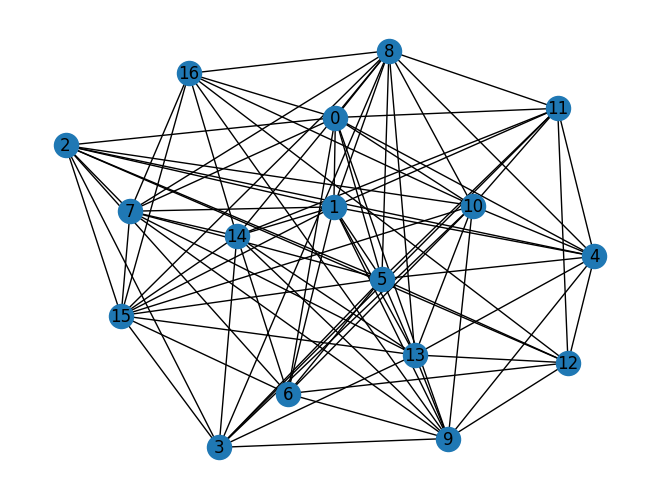

In [2]:
import numpy as np
import random as rd
import networkx as nx
import matplotlib.pylab as plt
verbose=True
def gen_graph():
	while True:
		if verbose:print('----------')
		Msize=rd.randint(5,20)
		M=np.random.randint(0,10,(Msize,Msize))
		#print(M)
		for i in range(Msize):
			for j in range(Msize):
				if(rd.randint(0,100)>50):
					M[i,j]=0
		G=nx.from_numpy_array(M)

		G.remove_edges_from(list(nx.selfloop_edges(G)))

		if not nx.is_directed_acyclic_graph(G):
			#if verbose:print("not DAG")
			if not (G.is_multigraph()):
				if verbose:print('multigraph',G.is_multigraph())\
				
				if nx.is_connected(G):
					if nx.number_of_isolates(G)==0:
						if verbose:print('no isolates')
						break
	M=nx.to_numpy_array(G)
	M=np.triu(M)

	return nx.from_numpy_array(M)

G1=gen_graph()	



M1=nx.to_numpy_array(G1)
G1=nx.from_numpy_array(M1)

np.savetxt('Mapa.csv',M1,delimiter=',')
if verbose:
	edge_colors = M1[np.triu_indices_from(M1)]
	edges=np.ones((edge_colors.shape[0],4))
	#print(edge_colors)
	pos = nx.spring_layout(G1)
	#print(pos)
	#nx.draw(G1, pos=pos, with_labels=True, edge_color=edges)
	print(M1)
	nx.draw(G1,with_labels = True)
	plt.show()

In [3]:
def Dijkstra(Madyacencia, start,end):
	i=0
	Dis_nodes=-1*np.ones(Madyacencia.shape[0])
	Dis_nodes[start]=0
	#print(Dis_nodes)
	current_node=start
	current_distance=0
	visited_nodes=[current_node]
	while True:
		i+=1
		conexion=Madyacencia[current_node]
		Notfound=True
		while Notfound:
			conexion=np.where(conexion!=0,conexion,999)
			
			new_node=np.argmin(conexion)
			print(conexion)
			if not(new_node in visited_nodes):
				Notfound=False
				visited_nodes.append(new_node)
				current_node=new_node
				#print(conexion)
				print(new_node)
			else:
				conexion[new_node]=999

		if current_node==end:
			break




[999   3 999   2 999]
3
[  2   4   1 999 999]
2
[999   3 999   1   2]
[999   3 999 999   2]
4
[0, 3, 2, 4]


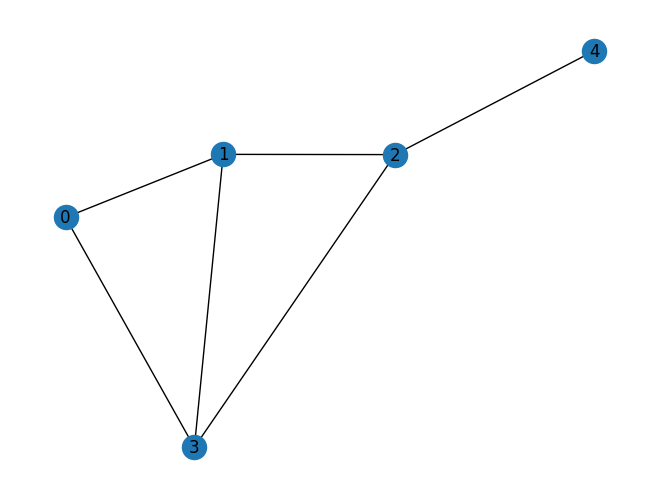

In [4]:
Ma=np.array((
	[0,3,0,2,0],
	[3,0,3,4,0],
	[0,3,0,1,2],
	[2,4,1,0,0],
	[0,0,2,0,0]
))
Dijkstra(Ma,0,4)
G=nx.from_numpy_array(Ma)
nx.draw(G,with_labels = True)
print(nx.shortest_path(G,source=0,target=4, weight='weight'))

In [48]:
arr = np.loadtxt("Mapa.csv",delimiter=",")
print(arr)

[[0. 8. 0. 6. 0. 6. 0. 0. 0.]
 [8. 0. 9. 1. 0. 2. 0. 7. 1.]
 [0. 9. 0. 3. 0. 1. 0. 3. 7.]
 [6. 1. 3. 0. 4. 1. 5. 2. 6.]
 [0. 0. 0. 4. 0. 7. 7. 2. 5.]
 [6. 2. 1. 1. 7. 0. 0. 9. 4.]
 [0. 0. 0. 5. 7. 0. 0. 0. 3.]
 [0. 7. 3. 2. 2. 9. 0. 0. 6.]
 [0. 1. 7. 6. 5. 4. 3. 6. 0.]]


In [52]:
def min_dis(Q,dis):
	L=999
	min=Q[-1]+100
	for i in Q:
		if dis[i]<L:
			L=dis[i]
			min=i
	return min

def prev_to_path(prev, end):
	current=end
	
	path=[]
	for i in range(prev.shape[0]):
		path.append(prev[current])
		current=int(prev[current])
	path=np.array(path)
	return path[path>0]

def Dijkstra2(Madjayencia, start,end):
	Ma=np.copy(Madjayencia)
	n_nodes=Ma.shape[0]

	distance_nodes=np.ones(n_nodes)*999 # an array that contains the current distances from the source to other vertices
	distance_nodes[start]=0
	prev=-1*np.ones(n_nodes) 				# Saves the index of the previous node, say prev[5]=3 means the node before 5 is 3 in the path
	Q=np.arange(n_nodes)
	#print(Ma)
	NotEmpty=True
	
	while NotEmpty:
		#print('-=------------------')
		u=min_dis(Q,distance_nodes)
		if u>100:
			break
		
		conections=Ma[u]
		conections=np.where(conections!=0,conections,999)
		print("Array Q   ",Q)
		print("distancia ",distance_nodes)
		print("conexiones",conections)
		print(u)

		Q=np.delete(Q,np.where(Q == u)[0])
		for i in conections:
			i=int(i)
			
			if i in Q:
				alt=distance_nodes[u] + conections[i]
				if alt < distance_nodes[i]:
					#print("actualiza", i)
					distance_nodes[i]=alt
					prev[i]=u

		if Q.size==1:
			break
		if u==end:
			break

	#print( prev_to_path(prev, end))
	print(prev)

start=2
end=6
Dijkstra2(arr,start,end)


Array Q    [0 1 2 3 4 5 6 7 8]
distancia  [999. 999.   0. 999. 999. 999. 999. 999. 999.]
conexiones [999.   9. 999.   3. 999.   1. 999.   3.   7.]
2
Array Q    [0 1 3 4 5 6 7 8]
distancia  [999.   9.   0.   3. 999. 999. 999.   3. 999.]
conexiones [  6.   1.   3. 999.   4.   1.   5.   2.   6.]
3
Array Q    [0 1 4 5 6 7 8]
distancia  [999.   4.   0.   3.   7.   4.   8.   3. 999.]
conexiones [999.   7.   3.   2.   2.   9. 999. 999.   6.]
7
Array Q    [0 1 4 5 6 8]
distancia  [999.   4.   0.   3.   7.   4.   8.   3. 999.]
conexiones [  8. 999.   9.   1. 999.   2. 999.   7.   1.]
1
Array Q    [0 4 5 6 8]
distancia  [999.   4.   0.   3.   7.   4.   8.   3.   5.]
conexiones [  6.   2.   1.   1.   7. 999. 999.   9.   4.]
5
Array Q    [0 4 6 8]
distancia  [999.   4.   0.   3.   7.   4.   8.   3.   5.]
conexiones [999.   1.   7.   6.   5.   4.   3.   6. 999.]
8
Array Q    [0 4 6]
distancia  [999.   4.   0.   3.   7.   4.   8.   3.   5.]
conexiones [999. 999. 999.   4. 999.   7.   7.   2.   5.]
4

[2, 5, 3, 6]


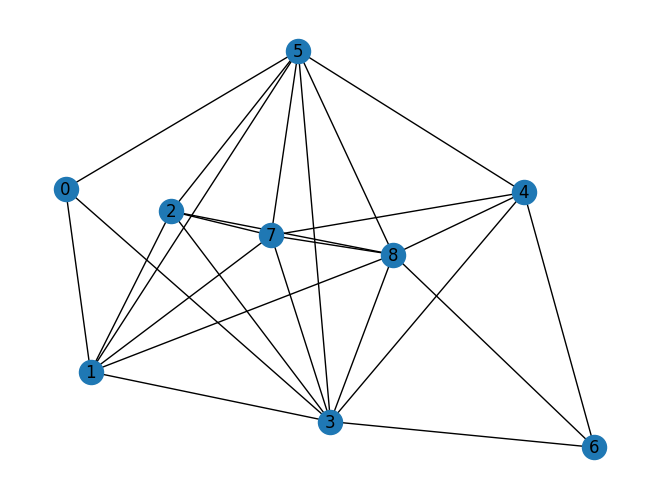

In [53]:
G=nx.from_numpy_array(arr)
nx.draw(G,with_labels = True)
print(nx.shortest_path(G,source=start,target=end, weight='weight'))
